In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.linalg as spla
from numpy import linalg as LA

In [2]:
#timestep
dt = 0.1

# Heun

In [3]:
t0 = 0
Tf = 10.
# dti = 1./dt

t = t0
N = 100

nsteps = int(round((Tf-t0)/dt))
I = np.identity(N)
IC = np.ones((N,1))

#matrix compression
A = sp.diags([1., -2., 1.], [-1, 0, 1], shape=[N, N], format = 'csr')
Af = sp.csr_matrix.toarray(A)

#diagonalize
D, T = LA.eig(Af)

In [4]:
mat = I + dt*A + dt*dt/2.*A*A

#uc = u_n, unew = u_(n+1)

uc = IC
z0 = LA.solve(T,uc)
errors = np.zeros(nsteps)

for k in range(0,nsteps):
    t += dt
    Dt = D*t
    unew = mat*uc
    uc = unew
    yex = np.dot(T,np.dot(np.diag(np.exp(Dt)),z0))
    errors[k] = np.max(np.abs(unew-yex))

print(np.max(errors))

0.0013958084652958558


# AB2

In [5]:
t0 = 0
Tf = 10.
dti = 1./dt

t = t0
N = 100

nsteps = int(round((Tf-t0)/dt))
I = np.identity(N)
IC = np.ones((N,1))

#matrix compression
A = sp.diags([1., -2., 1.], [-1, 0, 1], shape=[N, N], format = 'csr')
Af = sp.csr_matrix.toarray(A)

#diagonalize
D, T = LA.eig(Af)

In [6]:
mat1 = I + (3/2.) * dt * A
mat2 = (dt/2) * A

uc1 = IC
uc2 = (I + dt*A + dt*dt/2.*A*A) * uc1 # Heun u_i+1 = 矩阵 * u_i
z0 = LA.solve(T,uc2)
error_ab2 = np.zeros(nsteps)

for k in range(2,nsteps):
    t += dt
    Dt = D*t
    unew = mat1 * uc2 - mat2 * uc1
    uc1 = uc2
    uc2 = unew
    
    yex = np.dot(T,np.dot(np.diag(np.exp(Dt)),z0))
    error_ab2[k] = np.max(np.abs(unew-yex)) 

print(np.max(error_ab2))

0.002518750935008085


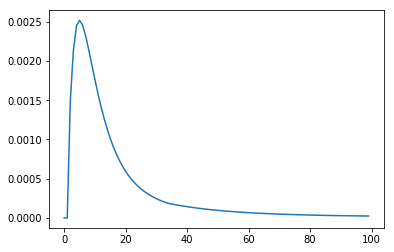

In [7]:
plt.plot(error_ab2)

# AM3

In [8]:
t0 = 0
Tf = 10.
dti = 1./dt

t = t0
N = 100

nsteps = int(round((Tf-t0)/dt))
I = np.identity(N)
IC = np.ones((N,1))

#matrix compression
A = sp.diags([1., -2., 1.], [-1, 0, 1], shape=[N, N], format = 'csr')
Af = sp.csr_matrix.toarray(A)

#diagonalize
D, T = LA.eig(Af)

In [9]:
mat1 = I - (5/12.) * dt * A
mat2 = I + (2/3.) * dt * A
mat3 = (dt/12.) * A

uc1 = IC
uc2 = (I + dt*A + dt*dt/2.*A*A) * uc1 # Heun
z0 = LA.solve(T,uc2)
error_am3 = np.zeros(nsteps)

for k in range(2,nsteps):
    t += dt
    Dt = D*t
    aux = mat2 * uc2 - mat3 * uc1
    unew = LA.solve(mat1, aux)
    uc1 = uc2
    uc2 = unew
    
    yex = np.dot(T,np.dot(np.diag(np.exp(Dt)),z0))
    error_am3[k] = np.max(np.abs(unew-yex))

print(np.max(error_am3))

5.3230193041930995e-05


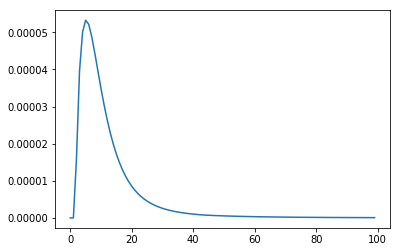

In [10]:
plt.plot(error_am3)